In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer() #real world dataset

# XX = breast_cancer.data
# Y = breast_cancer.target

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
# data is the full data dataframe

XX = data.drop('class', axis=1)
Y = data['class']
# dataframe. more convenient

XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,test_size=0.1, stratify=Y,random_state=1)
# returns same type as what was passed as input

In [3]:
#original data - not binarised data

XX_train = XX_train.values
XX_test = XX_test.values

In [4]:
from sklearn.metrics import accuracy_score
# accuracy from prediction, ground_turth
# what fraction is same in the two vectors(iterables)
# accuracy_score(one, two)

## Perceptron

y = 1 if weighted sum >= b; input can be real  
parameters - weights vector, one bias

### Model class template

- init - model parameters..
- model - give ouput for one input,X
- predict - find output for all given inputs,XX (prediction for whole data)
- fit - learn right parameters, given training data - XX,Y

In [5]:
# perceptron class
from perceptron_v1 import PerceptronV1

In [6]:
perceptron_v1 = PerceptronV1()

perceptron_v1.fit(XX_train, Y_train)

In [7]:
# learned weights
perceptron_v1.W

array([ 4.4787000e+02,  8.3489000e+02,  2.7157700e+03,  2.0408000e+03,
        5.7084700e+00,  2.0157400e+00, -2.3629660e+00, -7.8631100e-01,
        9.9227000e+00,  4.5390700e+00,  3.2492000e+00,  6.7091400e+01,
        1.3170500e+01, -1.1429410e+03,  1.3688870e+00,  1.4125040e+00,
        1.2378939e+00,  1.1849880e+00,  2.0698010e+00,  1.1560210e+00,
        4.4626900e+02,  1.0824500e+03,  2.6876200e+03, -3.7992000e+03,
        7.2313300e+00,  1.2725100e+00, -3.1415070e+00, -7.8600000e-02,
        1.4028700e+01,  4.9343900e+00])

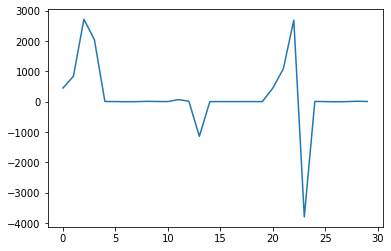

In [8]:
plt.plot(perceptron_v1.W)
plt.show()

In [9]:
Y_pred_train = perceptron_v1.predict(XX_train)
print(accuracy_score(Y_pred_train,Y_train))

0.373046875


very low accuracy

we went through all X once. - but doing that once is not sufficient. we might have to iterate over all X several times     

through whole data once => one epoch  
need multiple epochs.  



### Epochs

In [10]:
# perceptron class with fit function that iterates trough multiple epochs
from perceptron_v2 import PerceptronV2

0.921875


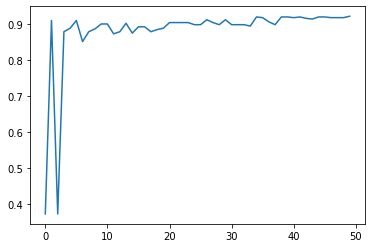

In [11]:
perceptron_v2 = PerceptronV2()

perceptron_v2.fit(XX_train, Y_train, 50) #repeat 50 epochs

Number of epochs is a hyperparameter.

### Checkpointing

Best accuracy(max) will be coming in a epoch in between, save it to a variable (parameters corresponding to best accuracy so far). And after all epochs update model parameters to those best_parameters.

In [12]:
# perceptron class with fit function that does check pointing
from perceptron_v3 import PerceptronV3

0.921875


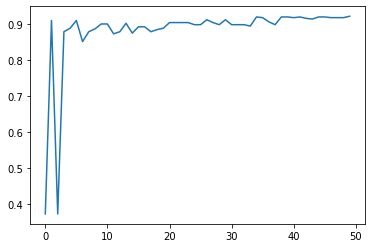

In [13]:
perceptron_v3 = PerceptronV3()

perceptron_v3.fit(XX_train, Y_train, 50)

In [14]:
Y_pred_train = perceptron_v3.predict(XX_train)
print(accuracy_score(Y_pred_train,Y_train))

#gets the highest accuracy one.

# as model is 'trained' to optimal parameters
# parameters with best accuracy is updated as model parameter values

0.921875


### Learning Rate

In [15]:
# perceptron class with fit function that includes learning rate also
from perceptron_v4 import PerceptronV4

0.91796875


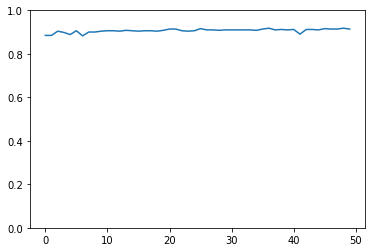

In [16]:
perceptron_v4 = PerceptronV4()

perceptron_v4.fit(XX_train, Y_train, 50, 0.0001)

Learning rate is another hyperparameter.  
A very small learning rate - is saying to make small changes only -> to avoid oscillations.

Perceptron model has more accuracy as compared to MP neuron model - as its a more complex model.(more parameters)

### Validation in test data

In [17]:
#test accuracy
Y_pred_test = perceptron_v4.predict(XX_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9298245614035088


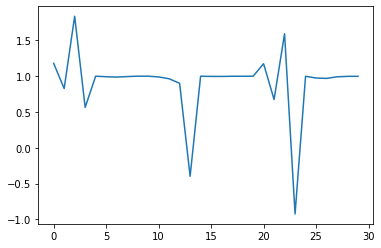

In [18]:
plt.plot(perceptron_v4.W)
plt.show()

### Visualizing weights(parameters)

While training the model, after each epoch - append the current weights(parameters) to a list. And in the end return it.  
i-th row in it : weights after i-th epoch  
then we visualize with that

Display row by row - frame by frame.  
update plot data - with the row - using the line handler



Matplotlib animation in jupyter:  
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [21]:
# perceptron class that populates and returns a weight matrix
# weight after each epochs - list
from perceptron_v5 import PerceptronV5

0.92578125


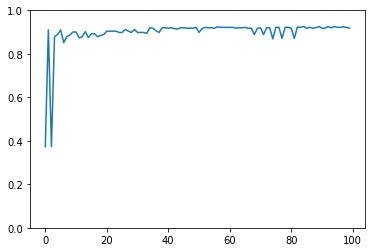

In [22]:
perceptron_v5 = PerceptronV5()
wt_matrix = perceptron_v5.fit(XX_train, Y_train, 100, 1)

In [23]:
# wt_matrix has array of weight-array-after-each-epoch

### Animating

In [24]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML # for diplaying video in jupyter 

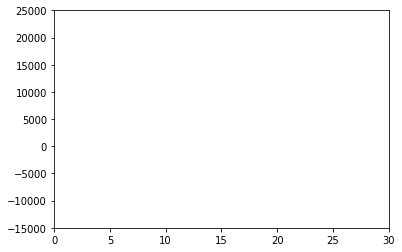

In [25]:
# First set up the figure, the axis, and the plot properties
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000)) #set after seeing wt of last epoch.. wt_matrix[-1,:]

line, = ax.plot([], [], lw=2) # handler to line - can update plot data with this

In [26]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :] #i-th row from weight matrix
    line.set_data(x, y) #set that as plot data using the line handler
    return (line,)

In [27]:
# call the animator. 
# blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)
#repreatedly calling the animate function
#here calling 100 times

HTML to render html content in jupyter notebook. Here, to display a video(html video).

In [28]:
HTML(anim.to_html5_video()) # return html video; display using HTML

#need to convert to a html video to show in jupyter..  not needed if running in shell.

How each weights(parameters) are getting evolved with epochs.

### exercises:
- try different test, train split  
- try a different binarisation (better threshold, better methods for binarising)  
- mp neuron - plot accuracy vs b. (b-parameter space)  
- test accuracy, train accuracy on same plot - see if they are correlated.
- try different - #epochs, learning rate for perceptron.(hyperparameters)
- initialising weights - was done deterministically above.. - use a random initialiser - use a seed so that we can reproduce the results.
- weight animation - when learning rate is small, different number of epochs.